In [1]:
# Time Series fundamentals with TensorFlow
# We are going to predict price of BITCOIN based on the historical price of Bitcoin

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-11 13:37:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2023-02-11 13:37:37 (6.21 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:


# Import with pandas 
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 
                 parse_dates=["Date"], 
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()
     


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:


# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()
     


,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


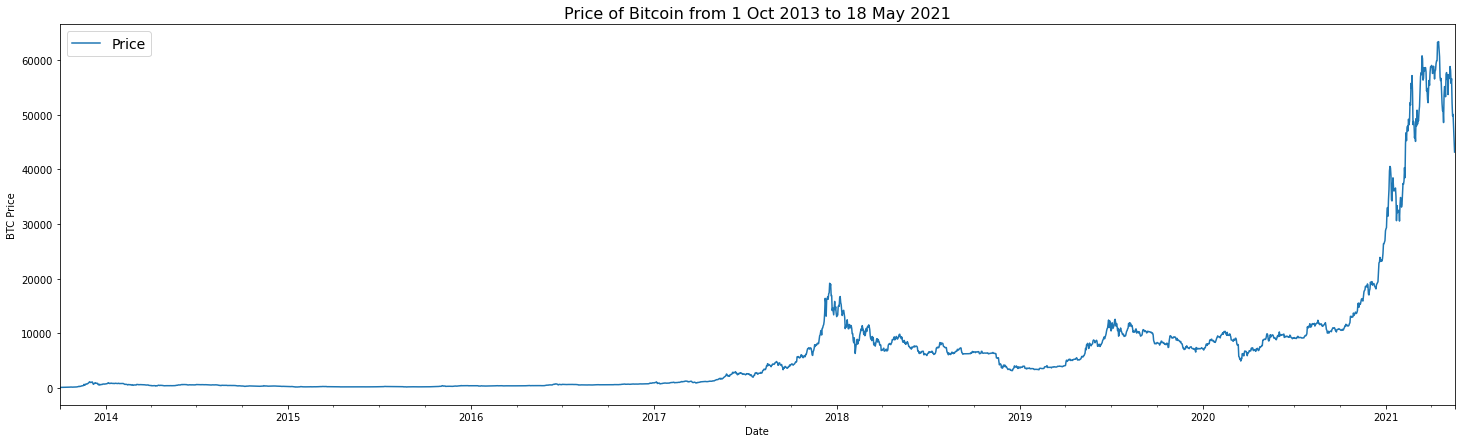

In [7]:


import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(25, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);
     


In [8]:


# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]
     


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

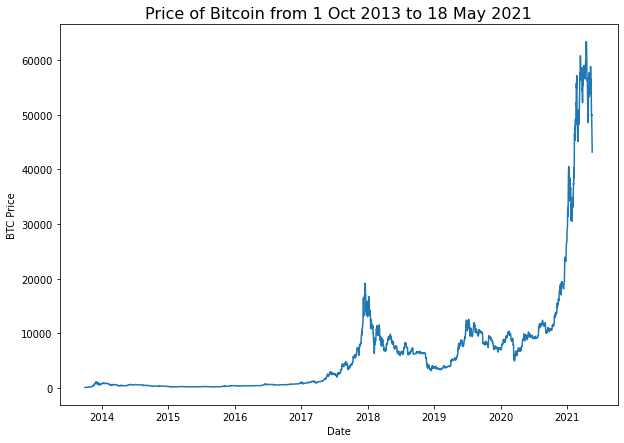

In [9]:


# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");
     


In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]
     

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:

# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((2229,), (558,), (2229,), (558,))

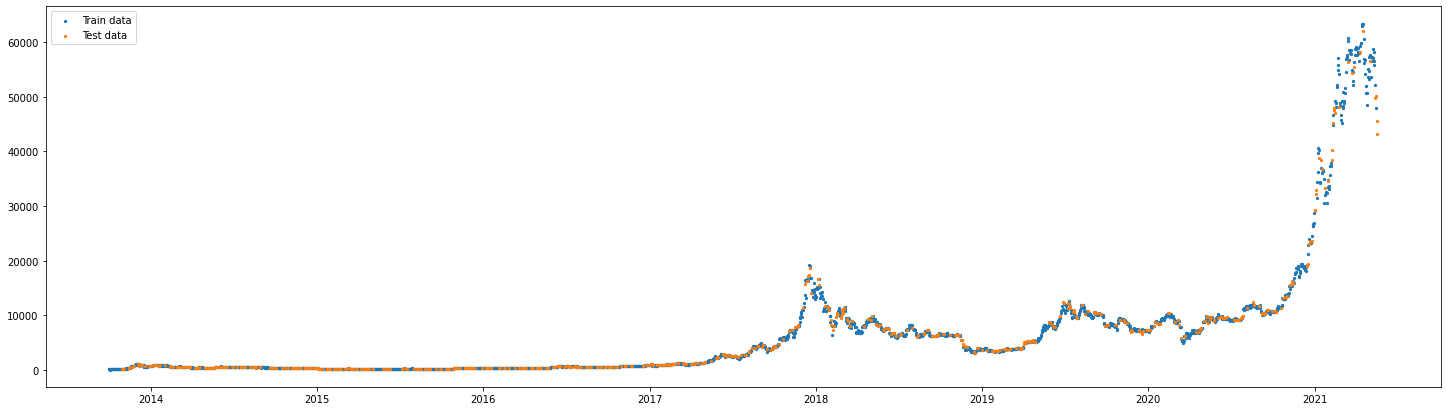

In [12]:
plt.figure(figsize = (25,7))
plt.scatter(X_train,y_train, s = 5, label = "Train data")
plt.scatter(X_test,y_test,s = 5, label = "Test data")

plt.legend()
plt.show();

In [13]:


# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)
     


(2229, 558, 2229, 558)

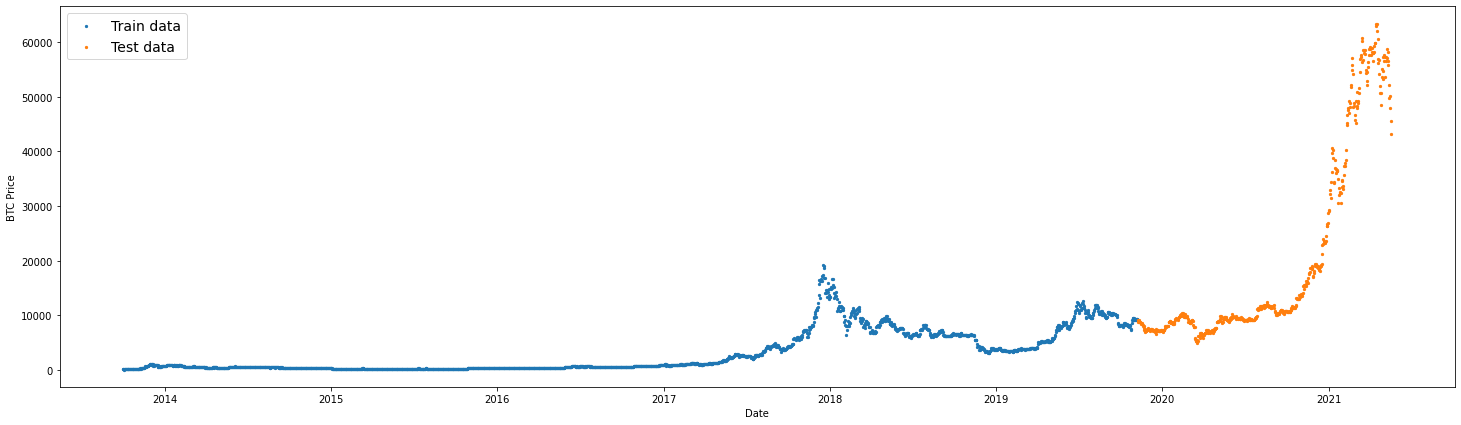

In [14]:


# Plot correctly made splits
plt.figure(figsize=(25, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();
     


In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)
     


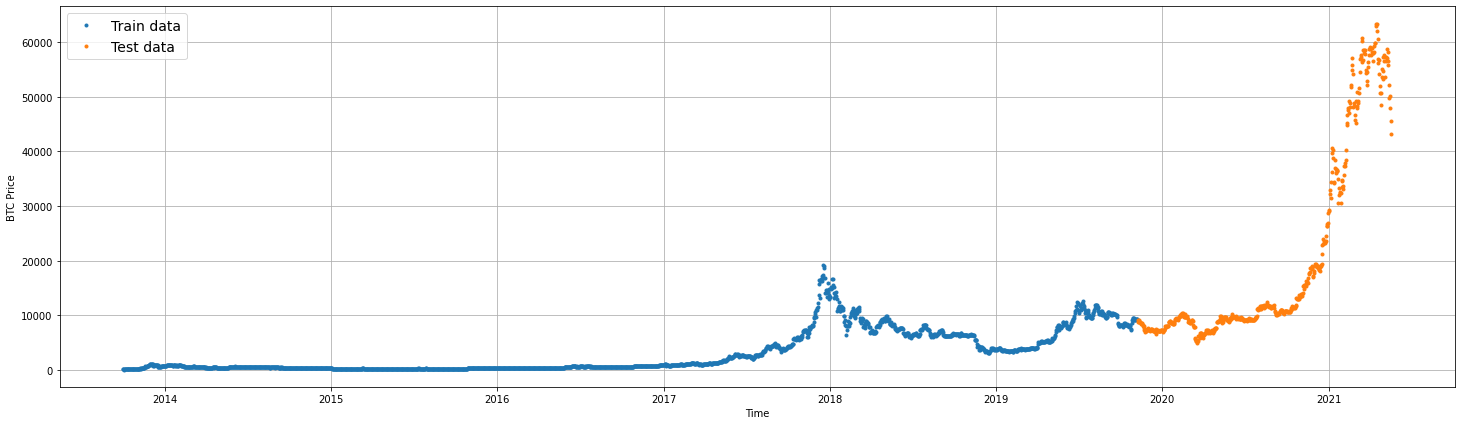

In [16]:
# Try out our plotting function
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Building baseline naive model

Models formula:

$$\hat{y}_{t} = y_{t-1}$$

In [17]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 
     

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

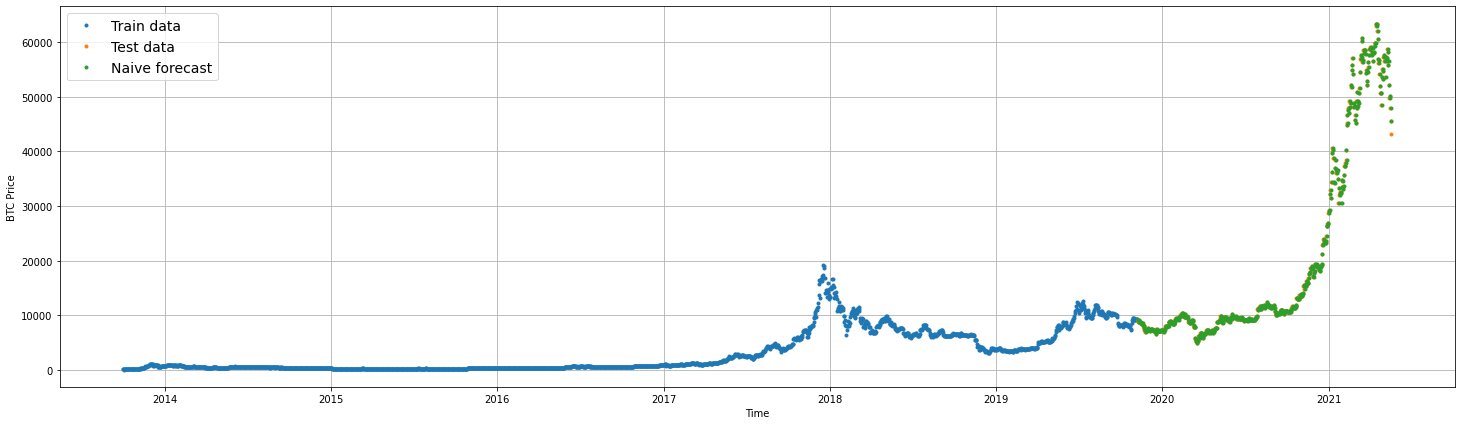

In [18]:

# Plot naive forecast
plt.figure(figsize=(25, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive forecast");
     


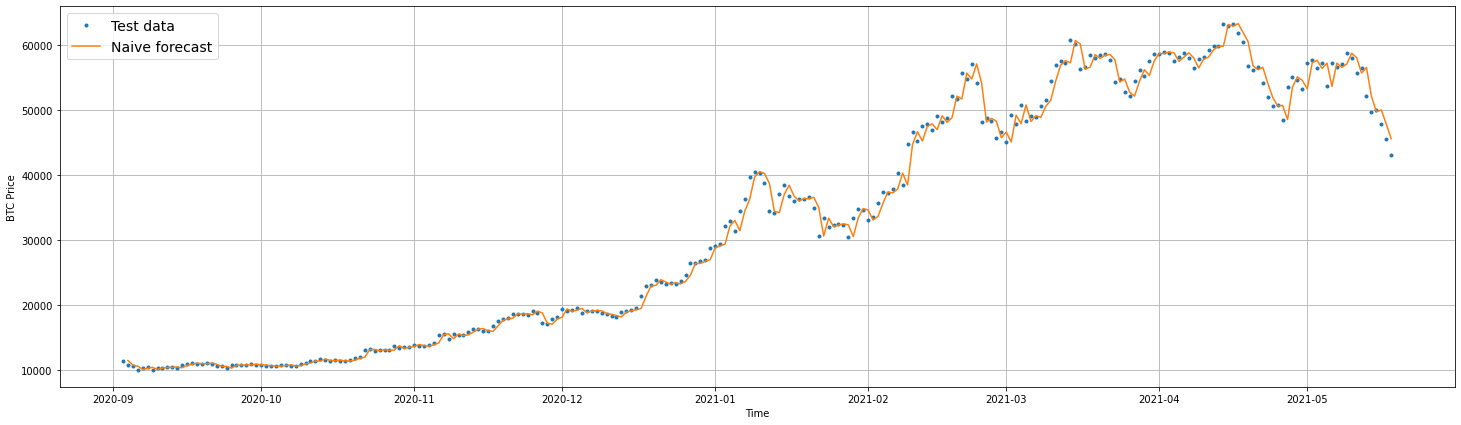

In [19]:


plt.figure(figsize=(25, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");
     


In [20]:
import tensorflow as tf
import numpy as np

In [21]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season
     


def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
     


In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [23]:


# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()
     


20056.632963737222

In [24]:
HORIZON = 1
WINDOW_SIZE = 7

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]
     



In [25]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [26]:
def make_windows(x,window_size = WINDOW_SIZE, horizon = HORIZON):

  """
  Turns 1D array into a 2D array of sequential labelled windows of window_size with hirizon size labels.
  """

  window_step = np.expand_dims(np.arange(window_size+horizon), axis = 0)
  window_indx = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)),axis=0).T
  windowed_array = np.array(x)[window_indx]
  windows,labels = get_labelled_windows(windowed_array,horizon=horizon)
  return windows,labels



In [27]:
full_windows, full_labels = make_windows(btc_price)

len(full_windows), len(full_labels)

(2780, 2780)

In [28]:
for i in range(3):
  print(f'Windows: {full_windows[i]} - > Label: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] - > Label: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] - > Label: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] - > Label: [125.96116]


In [29]:
def make_train_test_splits(windows, labels, test_split = 0.2):

  """
  Splits matching pairs of windows and labels into train and test sets
  """  
  split_size = int(len(windows)*(1-test_split))
  
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels



In [30]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [31]:
import os
import tensorflow as tf

def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            monitor = 'val_loss',
                                            verbose = 0,
                                            save_best_only = True)

## Model 1: Dense model (window = 7, horizon = 1)

In [32]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
], name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1991.7264 - mae: 1991.7264 - mse: 12139036.0000  

18/18 [==============================] - 5s 47ms/step - loss: 1991.7264 - mae: 1991.7264 - mse: 12139036.0000 - val_loss: 1079.7373 - val_mae: 1079.7373 - val_mse: 3857418.2500
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 392.1125 - mae: 392.1125 - mse: 592194.5000 - val_loss: 1934.8210 - val_mae: 1934.8213 - val_mse: 8715894.0000
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 246.4564 - mae: 246.4564 - mse: 278428.5938 - val_loss: 1140.7615 - val_mae: 1140.7615 - val_mse: 3883122.7500
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 241.4634 - mae: 241.4634 - mse: 266436.6250

18/18 [==============================] - 0s 29ms/step - loss: 194.2711 - mae: 194.2711 - mse: 190334.7344 - val_loss: 1038.6228 - val_mae: 1038.6228 - val_mse: 3442830.2500
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 176.7661 - mae: 176.7661 - mse: 120517.1641

18/18 [==============================] - 0s 28ms/step - loss: 179.9655 - mae: 179.9655 - mse: 175016.4531 - val_loss: 995.1144 - val_mae: 995.1144 - val_mse: 3151577.7500
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 174.0101 - mae: 174.0101 - mse: 161353.7344

18/18 [==============================] - 1s 29ms/step - loss: 174.0101 - mae: 174.0101 - mse: 161353.7344 - val_loss: 960.3941 - val_mae: 960.3941 - val_mse: 3110717.5000
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 212.1959 - mae: 212.1959 - mse: 318094.5000

18/18 [==============================] - 1s 39ms/step - loss: 167.7567 - mae: 167.7567 - mse: 152488.4062 - val_loss: 958.4884 - val_mae: 958.4884 - val_mse: 2907381.0000
Epoch 8/100
14/18 [======================>.......] - ETA: 0s - loss: 158.7837 - mae: 158.7837 - mse: 137891.7656

18/18 [==============================] - 1s 42ms/step - loss: 160.4864 - mae: 160.4864 - mse: 141139.7188 - val_loss: 869.6833 - val_mae: 869.6833 - val_mse: 2560206.0000
Epoch 9/100
11/18 [=================>............] - ETA: 0s - loss: 160.4172 - mae: 160.4172 - mse: 130980.5000

18/18 [==============================] - 1s 46ms/step - loss: 158.4866 - mae: 158.4866 - mse: 134264.8594 - val_loss: 865.0376 - val_mae: 865.0376 - val_mse: 2402316.7500
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 147.2995 - mae: 147.2995 - mse: 118714.1094

18/18 [==============================] - 1s 33ms/step - loss: 150.4835 - mae: 150.4835 - mse: 126487.3125 - val_loss: 822.0624 - val_mae: 822.0624 - val_mse: 2245147.7500
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 145.0464 - mae: 145.0464 - mse: 117083.7031 - val_loss: 827.0099 - val_mae: 827.0099 - val_mse: 2178122.2500
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 142.4265 - mae: 142.4265 - mse: 113593.3828 - val_loss: 862.7220 - val_mae: 862.7220 - val_mse: 2216250.5000
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 127.1253 - mae: 127.1253 - mse: 95007.2500

18/18 [==============================] - 0s 29ms/step - loss: 141.8364 - mae: 141.8364 - mse: 111862.6250 - val_loss: 803.4485 - val_mae: 803.4485 - val_mse: 2017651.3750
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 136.3141 - mae: 136.3141 - mse: 104984.4062 - val_loss: 806.7764 - val_mae: 806.7764 - val_mse: 1995790.7500
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 136.8500 - mae: 136.8500 - mse: 104078.7656

18/18 [==============================] - 1s 41ms/step - loss: 136.8500 - mae: 136.8500 - mse: 104078.7656 - val_loss: 759.0481 - val_mae: 759.0481 - val_mse: 1841974.2500
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 133.0823 - mae: 133.0823 - mse: 98588.5859 - val_loss: 760.7977 - val_mae: 760.7977 - val_mse: 1819018.3750
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 131.4906 - mae: 131.4906 - mse: 97415.7734 - val_loss: 811.8078 - val_mae: 811.8078 - val_mse: 1946866.6250
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 149.3219 - mae: 149.3219 - mse: 109945.0156

18/18 [==============================] - 1s 29ms/step - loss: 133.1413 - mae: 133.1413 - mse: 98897.2266 - val_loss: 731.9208 - val_mae: 731.9208 - val_mse: 1705237.1250
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 79.6950 - mae: 79.6950 - mse: 37790.1953

18/18 [==============================] - 0s 29ms/step - loss: 127.2366 - mae: 127.2366 - mse: 92521.2891 - val_loss: 725.2344 - val_mae: 725.2344 - val_mse: 1670697.7500
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5087 - mae: 138.5087 - mse: 102271.2656

18/18 [==============================] - 1s 29ms/step - loss: 125.5849 - mae: 125.5849 - mse: 91110.9766 - val_loss: 687.1729 - val_mae: 687.1729 - val_mse: 1619085.5000
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 128.8745 - mae: 128.8745 - mse: 94459.2891 

18/18 [==============================] - 1s 29ms/step - loss: 128.8745 - mae: 128.8745 - mse: 94459.2891 - val_loss: 683.2464 - val_mae: 683.2464 - val_mse: 1540878.8750
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 123.0908 - mae: 123.0908 - mse: 87521.2188 - val_loss: 690.4068 - val_mae: 690.4068 - val_mse: 1541206.8750
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5992 - mae: 125.5992 - mse: 88871.7656 - val_loss: 688.2289 - val_mae: 688.2289 - val_mse: 1526447.3750
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 134.7399 - mae: 134.7399 - mse: 84474.2656

18/18 [==============================] - 1s 31ms/step - loss: 122.1834 - mae: 122.1834 - mse: 85604.9141 - val_loss: 654.2347 - val_mae: 654.2347 - val_mse: 1449816.8750
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 128.6547 - mae: 128.6547 - mse: 69094.3750

18/18 [==============================] - 0s 29ms/step - loss: 119.9330 - mae: 119.9330 - mse: 83452.6172 - val_loss: 645.3992 - val_mae: 645.3992 - val_mse: 1438741.2500
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 119.6821 - mae: 119.6821 - mse: 68031.0156

18/18 [==============================] - 0s 28ms/step - loss: 119.9556 - mae: 119.9556 - mse: 82966.5000 - val_loss: 639.1074 - val_mae: 639.1074 - val_mse: 1404985.7500
Epoch 27/100
18/18 [==============================] - ETA: 0s - loss: 120.6777 - mae: 120.6777 - mse: 82829.0547 

18/18 [==============================] - 0s 29ms/step - loss: 120.6777 - mae: 120.6777 - mse: 82829.0547 - val_loss: 634.6932 - val_mae: 634.6932 - val_mse: 1395192.2500
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 117.1291 - mae: 117.1291 - mse: 80346.7266 - val_loss: 637.7375 - val_mae: 637.7375 - val_mse: 1374838.0000
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 118.4272 - mae: 118.4272 - mse: 80497.7031

18/18 [==============================] - 1s 30ms/step - loss: 118.4272 - mae: 118.4272 - mse: 80497.7031 - val_loss: 633.1429 - val_mae: 633.1429 - val_mse: 1359852.1250
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 122.7518 - mae: 122.7518 - mse: 84150.1250

18/18 [==============================] - 0s 29ms/step - loss: 122.1199 - mae: 122.1199 - mse: 83316.7969 - val_loss: 621.4356 - val_mae: 621.4356 - val_mse: 1347096.5000
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 114.0678 - mae: 114.0678 - mse: 76695.4219 - val_loss: 631.7669 - val_mae: 631.7669 - val_mse: 1346332.1250
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 115.2366 - mae: 115.2366 - mse: 78291.4531

18/18 [==============================] - 1s 29ms/step - loss: 114.5577 - mae: 114.5577 - mse: 78454.9219 - val_loss: 611.9183 - val_mae: 611.9183 - val_mse: 1306349.5000
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1256 - mae: 115.1256 - mse: 77787.5156 - val_loss: 671.4281 - val_mae: 671.4281 - val_mse: 1436302.0000
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0335 - mae: 115.0335 - mse: 78543.2422 - val_loss: 637.1577 - val_mae: 637.1577 - val_mse: 1383623.3750
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5461 - mae: 115.5461 - mse: 77028.8594 - val_loss: 623.7972 - val_mae: 623.7972 - val_mse: 1314801.7500
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 157.9856 - mae: 157.9856 - mse: 145040.5000

18/18 [==============================] - 1s 41ms/step - loss: 118.0198 - mae: 118.0198 - mse: 77242.4062 - val_loss: 600.2440 - val_mae: 600.2440 - val_mse: 1271913.5000
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 136.2796 - mae: 136.2796 - mse: 122669.9688

18/18 [==============================] - 0s 28ms/step - loss: 114.4520 - mae: 114.4520 - mse: 77817.1953 - val_loss: 599.4831 - val_mae: 599.4831 - val_mse: 1259303.7500
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3768 - mae: 113.3768 - mse: 75388.8750 - val_loss: 633.2531 - val_mae: 633.2531 - val_mse: 1359748.3750
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.7058 - mae: 127.7058 - mse: 99876.3359

18/18 [==============================] - 1s 37ms/step - loss: 113.1970 - mae: 113.1970 - mse: 74514.7656 - val_loss: 592.1576 - val_mae: 592.1576 - val_mse: 1241230.2500
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 111.5572 - mae: 111.5572 - mse: 73704.5000 - val_loss: 600.6766 - val_mae: 600.6766 - val_mse: 1268562.3750
Epoch 41/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7655 - mae: 110.7655 - mse: 73815.2188 - val_loss: 601.5339 - val_mae: 601.5339 - val_mse: 1268668.3750
Epoch 42/100
18/18 [==============================] - 0s 10ms/step - loss: 115.7106 - mae: 115.7106 - mse: 77424.7969 - val_loss: 673.5190 - val_mae: 673.5190 - val_mse: 1421874.0000
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 118.7468 - mae: 118.7468 - mse: 75092.1172 - val_loss: 691.8261 - val_mae: 691.8261 - val_mse: 1505173.1250
Epoch 44/100
13/18 [====================>.........] - ETA: 0s - loss: 115.1215 - mae: 115.1215 - mse:

18/18 [==============================] - 1s 41ms/step - loss: 116.7176 - mae: 116.7176 - mse: 75300.5312 - val_loss: 581.1276 - val_mae: 581.1276 - val_mse: 1210610.5000
Epoch 45/100
18/18 [==============================] - 0s 8ms/step - loss: 109.5042 - mae: 109.5042 - mse: 73118.9141 - val_loss: 585.0482 - val_mae: 585.0482 - val_mse: 1223196.7500
Epoch 46/100
18/18 [==============================] - 0s 7ms/step - loss: 110.1881 - mae: 110.1881 - mse: 71544.7656 - val_loss: 605.8197 - val_mae: 605.8197 - val_mse: 1254422.5000
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 110.1943 - mae: 110.1943 - mse: 72714.8125 - val_loss: 585.0045 - val_mae: 585.0045 - val_mse: 1210369.7500
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6194 - mae: 109.6194 - mse: 72221.6719 - val_loss: 604.4670 - val_mae: 604.4670 - val_mse: 1249476.8750
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 159.6670 - mae: 159.6670 - mse: 

18/18 [==============================] - 0s 28ms/step - loss: 113.9712 - mae: 113.9712 - mse: 74020.8281 - val_loss: 577.9546 - val_mae: 577.9546 - val_mse: 1196015.6250
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1410 - mae: 113.1410 - mse: 72912.9688 - val_loss: 659.3404 - val_mae: 659.3404 - val_mse: 1396231.7500
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8813 - mae: 111.8813 - mse: 72276.8281 - val_loss: 592.1190 - val_mae: 592.1190 - val_mse: 1219945.0000
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 112.1290 - mae: 112.1290 - mse: 73494.2656 - val_loss: 589.9896 - val_mae: 589.9896 - val_mse: 1225187.6250
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3642 - mae: 110.3642 - mse: 72627.2422 - val_loss: 612.8035 - val_mae: 612.8035 - val_mse: 1262270.7500
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5759 - mae: 109.5759 - m

18/18 [==============================] - 0s 28ms/step - loss: 108.5914 - mae: 108.5914 - mse: 71688.0859 - val_loss: 570.9572 - val_mae: 570.9572 - val_mse: 1174847.3750
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8564 - mae: 107.8564 - mse: 69633.1172 - val_loss: 603.9432 - val_mae: 603.9432 - val_mse: 1253416.6250
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5000 - mae: 114.5000 - mse: 74113.7109 - val_loss: 607.9259 - val_mae: 607.9259 - val_mse: 1246902.5000
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0124 - mae: 109.0124 - mse: 70580.0938 - val_loss: 579.6345 - val_mae: 579.6345 - val_mse: 1187974.0000
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6533 - mae: 108.6533 - mse: 70966.4609 - val_loss: 572.6709 - val_mae: 572.6709 - val_mse: 1184066.7500
Epoch 66/100
18/18 [==============================] - ETA: 0s - loss: 107.1972 - mae: 107.1972 - mse: 

18/18 [==============================] - 1s 30ms/step - loss: 107.1972 - mae: 107.1972 - mse: 69493.1797 - val_loss: 568.4982 - val_mae: 568.4982 - val_mse: 1166222.5000
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 105.7546 - mae: 105.7546 - mse: 68213.8672 - val_loss: 622.7445 - val_mae: 622.7445 - val_mse: 1288846.0000
Epoch 68/100
17/18 [===========================>..] - ETA: 0s - loss: 107.8973 - mae: 107.8973 - mse: 67962.1250

18/18 [==============================] - 1s 29ms/step - loss: 107.1570 - mae: 107.1570 - mse: 67618.3828 - val_loss: 567.8855 - val_mae: 567.8855 - val_mse: 1165128.7500
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0621 - mae: 111.0621 - mse: 69921.5000 - val_loss: 671.4943 - val_mae: 671.4943 - val_mse: 1387308.6250
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 121.7531 - mae: 121.7531 - mse: 76261.1641 - val_loss: 586.0216 - val_mae: 586.0216 - val_mse: 1211440.6250
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9032 - mae: 106.9032 - mse: 68409.3594 - val_loss: 586.1991 - val_mae: 586.1991 - val_mse: 1198051.3750
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9615 - mae: 108.9615 - mse: 69815.5547 - val_loss: 568.2867 - val_mae: 568.2867 - val_mse: 1170983.1250
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3762 - mae: 112.3762 - m

18/18 [==============================] - 1s 29ms/step - loss: 106.4675 - mae: 106.4675 - mse: 69027.2500 - val_loss: 563.1754 - val_mae: 563.1754 - val_mse: 1155276.6250
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7985 - mae: 116.7985 - mse: 76372.5938 - val_loss: 567.6409 - val_mae: 567.6409 - val_mse: 1159407.6250
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3628 - mae: 114.3628 - mse: 73526.7734 - val_loss: 661.4868 - val_mae: 661.4868 - val_mse: 1380928.7500
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6433 - mae: 112.6433 - mse: 72369.5938 - val_loss: 563.8987 - val_mae: 563.8987 - val_mse: 1156989.0000
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0732 - mae: 107.0732 - mse: 69513.8438 - val_loss: 568.1306 - val_mae: 568.1306 - val_mse: 1159606.7500
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5137 - mae: 107.5137 - m

In [33]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 731.4667 - mae: 731.4667 - mse: 1549014.7500


[731.4667358398438, 731.4667358398438, 1549014.75]

In [34]:
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')

In [35]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 563.1754 - mae: 563.1754 - mse: 1155277.0000


[563.1754150390625, 563.1754150390625, 1155277.0]

In [36]:
def make_preds(model, input_data):
  
  """
  Makes prediction using provided model and input data.

  Args:
    model: model that will do prediction
    input_data: set of data to make predicition on

  Returns:
    prediction: an array of values predicted by our model
  """

  prediction = model.predict(input_data)
  
  return tf.squeeze(prediction)

In [37]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [38]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

model_1_results

{'mae': 563.17535,
 'mse': 1155277.0,
 'rmse': 1074.8381,
 'mape': 2.5082808,
 'mase': 0.9893431}

In [39]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

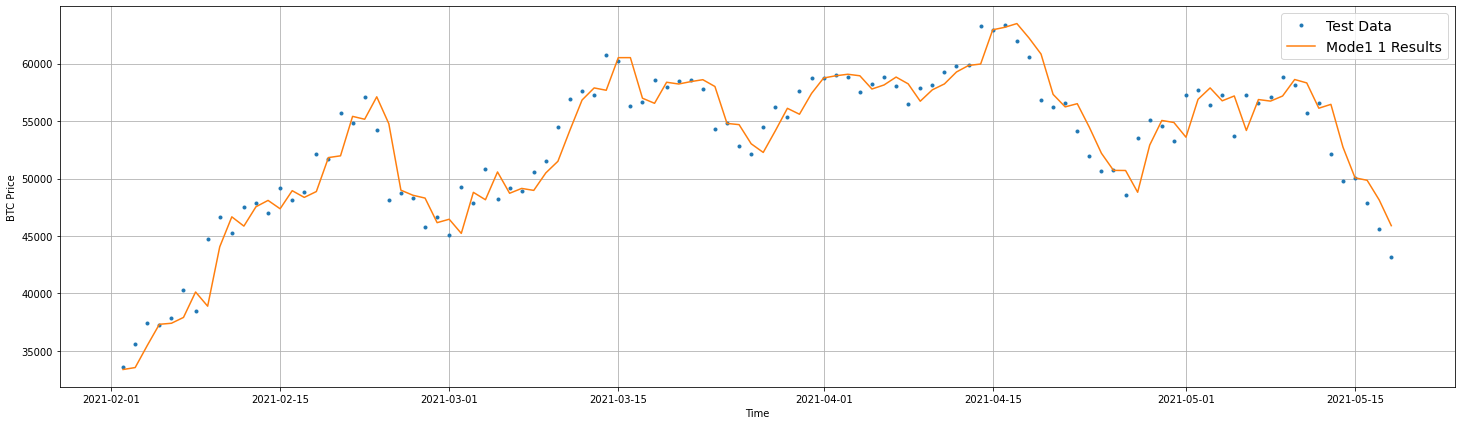

In [40]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "Test Data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format="-",
                 label = "Mode1 1 Results")


## Model 2: Dense model (window size = 30, horizon = 1)

In [41]:
HORIZON = 1
WINDOW_SIZE = 30


In [42]:
full_windows, full_labels = make_windows(btc_price)

len(full_windows), len(full_labels)

(2780, 2780)

In [43]:
for i in range(3):
  print(f'Windows: {full_windows[i]} - > Label: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] - > Label: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] - > Label: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] - > Label: [125.96116]


In [44]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [45]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
], name = 'model_2_dense')

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 14s - loss: 3437.7632 - mae: 3437.7632 - mse: 24299022.0000

18/18 [==============================] - 2s 44ms/step - loss: 1350.2853 - mae: 1350.2853 - mse: 6713955.5000 - val_loss: 3091.4639 - val_mae: 3091.4639 - val_mse: 20327672.0000
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 362.3796 - mae: 362.3796 - mse: 529259.4375

18/18 [==============================] - 1s 43ms/step - loss: 322.8329 - mae: 322.8329 - mse: 424106.0000 - val_loss: 993.2900 - val_mae: 993.2900 - val_mse: 2892637.0000
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 179.3013 - mae: 179.3013 - mse: 149690.5781

18/18 [==============================] - 1s 42ms/step - loss: 175.9666 - mae: 175.9666 - mse: 147568.6875 - val_loss: 917.0629 - val_mae: 917.0629 - val_mse: 2637633.2500
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 178.5414 - mae: 178.5414 - mse: 169495.1094

18/18 [==============================] - 1s 54ms/step - loss: 164.6438 - mae: 164.6438 - mse: 142305.6094 - val_loss: 866.1085 - val_mae: 866.1085 - val_mse: 2534247.2500
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 154.0586 - mae: 154.0586 - mse: 127138.9062

18/18 [==============================] - 1s 31ms/step - loss: 154.0586 - mae: 154.0586 - mse: 127138.9062 - val_loss: 836.9704 - val_mae: 836.9704 - val_mse: 2316188.5000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 149.2597 - mae: 149.2597 - mse: 120202.8672

18/18 [==============================] - 1s 30ms/step - loss: 149.2597 - mae: 149.2597 - mse: 120202.8672 - val_loss: 810.1505 - val_mae: 810.1505 - val_mse: 2141104.7500
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 145.1336 - mae: 145.1336 - mse: 114274.3672

18/18 [==============================] - 1s 30ms/step - loss: 145.1336 - mae: 145.1336 - mse: 114274.3672 - val_loss: 781.5579 - val_mae: 781.5579 - val_mse: 2027269.5000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 114.4248 - mae: 114.4248 - mse: 49710.2695

18/18 [==============================] - 1s 29ms/step - loss: 138.3022 - mae: 138.3022 - mse: 106901.5938 - val_loss: 759.2773 - val_mae: 759.2773 - val_mse: 1957097.2500
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 122.8066 - mae: 122.8066 - mse: 72613.7891

18/18 [==============================] - 0s 29ms/step - loss: 137.7965 - mae: 137.7965 - mse: 105957.9453 - val_loss: 751.2387 - val_mae: 751.2387 - val_mse: 1841840.3750
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 141.0826 - mae: 141.0826 - mse: 153609.0781

18/18 [==============================] - 1s 29ms/step - loss: 135.5063 - mae: 135.5063 - mse: 103718.2891 - val_loss: 728.0558 - val_mae: 728.0558 - val_mse: 1749892.6250
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 136.4846 - mae: 136.4846 - mse: 86714.5391

18/18 [==============================] - 1s 30ms/step - loss: 128.9664 - mae: 128.9664 - mse: 94947.3750 - val_loss: 725.5969 - val_mae: 725.5969 - val_mse: 1695130.0000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 128.3573 - mae: 128.3573 - mse: 93690.1172 - val_loss: 779.8222 - val_mae: 779.8222 - val_mse: 1814240.7500
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 128.5201 - mae: 128.5201 - mse: 93766.1719 - val_loss: 727.1909 - val_mae: 727.1909 - val_mse: 1648935.6250
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 128.5528 - mae: 128.5528 - mse: 68069.3906

18/18 [==============================] - 1s 29ms/step - loss: 121.8885 - mae: 121.8885 - mse: 87062.1406 - val_loss: 692.3708 - val_mae: 692.3708 - val_mse: 1545866.1250
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 114.9084 - mae: 114.9084 - mse: 53385.1016

18/18 [==============================] - 1s 60ms/step - loss: 126.6087 - mae: 126.6087 - mse: 87354.7344 - val_loss: 667.8093 - val_mae: 667.8093 - val_mse: 1476007.5000
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 116.2432 - mae: 116.2432 - mse: 78234.5938

18/18 [==============================] - 1s 61ms/step - loss: 118.4933 - mae: 118.4933 - mse: 82064.6172 - val_loss: 645.6409 - val_mae: 645.6409 - val_mse: 1422055.3750
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 118.8252 - mae: 118.8252 - mse: 83869.5156 - val_loss: 662.3114 - val_mae: 662.3114 - val_mse: 1438751.8750
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 116.1510 - mae: 116.1510 - mse: 80577.3984

18/18 [==============================] - 1s 58ms/step - loss: 116.1510 - mae: 116.1510 - mse: 80577.3984 - val_loss: 625.4609 - val_mae: 625.4609 - val_mse: 1364126.0000
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 117.1577 - mae: 117.1577 - mse: 80914.6719 - val_loss: 687.9594 - val_mae: 687.9594 - val_mse: 1480579.0000
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6319 - mae: 114.6319 - mse: 78536.8594 - val_loss: 625.7950 - val_mae: 625.7950 - val_mse: 1342784.0000
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 115.8086 - mae: 115.8086 - mse: 78450.4609

18/18 [==============================] - 1s 30ms/step - loss: 115.8086 - mae: 115.8086 - mse: 78450.4609 - val_loss: 621.6468 - val_mae: 621.6468 - val_mse: 1346080.7500
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2352 - mae: 115.2352 - mse: 79125.9531 - val_loss: 651.8706 - val_mae: 651.8706 - val_mse: 1380658.8750
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 118.5131 - mae: 118.5131 - mse: 57712.9219

18/18 [==============================] - 0s 29ms/step - loss: 116.2879 - mae: 116.2879 - mse: 77899.2969 - val_loss: 612.3247 - val_mae: 612.3247 - val_mse: 1316867.2500
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 116.1199 - mae: 116.1199 - mse: 80695.6172

18/18 [==============================] - 1s 46ms/step - loss: 114.7915 - mae: 114.7915 - mse: 79264.1797 - val_loss: 606.1373 - val_mae: 606.1373 - val_mse: 1288477.3750
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 112.1956 - mae: 112.1956 - mse: 76015.9531 - val_loss: 609.0699 - val_mae: 609.0699 - val_mse: 1302307.5000
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 117.9962 - mae: 117.9962 - mse: 77698.8984 - val_loss: 622.6716 - val_mae: 622.6716 - val_mse: 1332469.8750
Epoch 27/100
18/18 [==============================] - 0s 8ms/step - loss: 117.3215 - mae: 117.3215 - mse: 78426.5312 - val_loss: 614.4275 - val_mae: 614.4275 - val_mse: 1286369.6250
Epoch 28/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4714 - mae: 112.4714 - mse: 74784.2188 - val_loss: 608.7056 - val_mae: 608.7056 - val_mse: 1293499.1250
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 110.6096 - mae: 110.6096 - m

18/18 [==============================] - 1s 43ms/step - loss: 117.2855 - mae: 117.2855 - mse: 78192.3594 - val_loss: 589.2010 - val_mae: 589.2010 - val_mse: 1246570.8750
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 111.1683 - mae: 111.1683 - mse: 72499.3281 - val_loss: 633.9570 - val_mae: 633.9570 - val_mse: 1314549.3750
Epoch 32/100
18/18 [==============================] - 0s 8ms/step - loss: 112.2462 - mae: 112.2462 - mse: 75866.9609 - val_loss: 591.8687 - val_mae: 591.8687 - val_mse: 1237352.3750
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 111.5238 - mae: 111.5238 - mse: 74200.3281 - val_loss: 686.7153 - val_mae: 686.7153 - val_mse: 1437013.0000
Epoch 34/100
14/18 [======================>.......] - ETA: 0s - loss: 114.0929 - mae: 114.0929 - mse: 80987.7422 

18/18 [==============================] - 1s 40ms/step - loss: 111.7221 - mae: 111.7221 - mse: 74770.4766 - val_loss: 587.2953 - val_mae: 587.2953 - val_mse: 1236626.2500
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 98.7154 - mae: 98.7154 - mse: 52454.5469

18/18 [==============================] - 0s 29ms/step - loss: 110.2595 - mae: 110.2595 - mse: 72827.3203 - val_loss: 581.1839 - val_mae: 581.1839 - val_mse: 1216921.2500
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 115.9961 - mae: 115.9961 - mse: 75884.3594 - val_loss: 590.1306 - val_mae: 590.1306 - val_mse: 1224459.2500
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6839 - mae: 109.6839 - mse: 73408.7656 - val_loss: 597.0785 - val_mae: 597.0785 - val_mse: 1233512.3750
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8390 - mae: 113.8390 - mse: 74394.9531 - val_loss: 621.9331 - val_mae: 621.9331 - val_mse: 1304329.6250
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.5248 - mae: 127.5248 - mse: 109963.3828

18/18 [==============================] - 0s 29ms/step - loss: 110.2907 - mae: 110.2907 - mse: 72523.0781 - val_loss: 580.6415 - val_mae: 580.6415 - val_mse: 1207281.1250
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 108.7381 - mae: 108.7381 - mse: 71370.4453 - val_loss: 590.9619 - val_mae: 590.9619 - val_mse: 1235402.3750
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8806 - mae: 109.8806 - mse: 72368.2031 - val_loss: 608.9532 - val_mae: 608.9532 - val_mse: 1272064.0000
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0740 - mae: 109.0740 - mse: 72474.9219 - val_loss: 615.3547 - val_mae: 615.3547 - val_mse: 1262350.5000
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2654 - mae: 110.2654 - mse: 70502.6953 - val_loss: 639.9649 - val_mae: 639.9649 - val_mse: 1341958.5000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2781 - mae: 111.2781 - m

18/18 [==============================] - 0s 28ms/step - loss: 109.8547 - mae: 109.8547 - mse: 72914.6797 - val_loss: 574.2625 - val_mae: 574.2625 - val_mse: 1191192.1250
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 108.1115 - mae: 108.1115 - mse: 71057.6797 - val_loss: 580.2495 - val_mae: 580.2495 - val_mse: 1196413.2500
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7657 - mae: 111.7657 - mse: 73407.4531 - val_loss: 613.0120 - val_mae: 613.0120 - val_mse: 1257665.6250
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0166 - mae: 116.0166 - mse: 75937.5234 - val_loss: 718.5344 - val_mae: 718.5344 - val_mse: 1559805.2500
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 115.8117 - mae: 115.8117 - mse: 76273.9688 - val_loss: 605.5985 - val_mae: 605.5985 - val_mse: 1238826.3750
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 114.5860 - mae: 114.5860 - mse: 

18/18 [==============================] - 1s 30ms/step - loss: 112.7657 - mae: 112.7657 - mse: 74867.8203 - val_loss: 573.5023 - val_mae: 573.5023 - val_mse: 1190941.8750
Epoch 53/100
15/18 [========================>.....] - ETA: 0s - loss: 110.6997 - mae: 110.6997 - mse: 71998.2969

18/18 [==============================] - 1s 30ms/step - loss: 111.0751 - mae: 111.0751 - mse: 72530.1719 - val_loss: 573.2089 - val_mae: 573.2089 - val_mse: 1184058.2500
Epoch 54/100
18/18 [==============================] - ETA: 0s - loss: 107.9563 - mae: 107.9563 - mse: 71214.0156

18/18 [==============================] - 0s 29ms/step - loss: 107.9563 - mae: 107.9563 - mse: 71214.0156 - val_loss: 572.2390 - val_mae: 572.2390 - val_mse: 1184381.8750
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5775 - mae: 109.5775 - mse: 72606.7734 - val_loss: 575.6046 - val_mae: 575.6046 - val_mse: 1187781.7500
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6909 - mae: 107.6909 - mse: 70967.0234 - val_loss: 867.8778 - val_mae: 867.8778 - val_mse: 2076218.8750
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 130.1764 - mae: 130.1764 - mse: 86300.9062 - val_loss: 662.8377 - val_mae: 662.8377 - val_mse: 1397585.1250
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 117.4919 - mae: 117.4919 - mse: 74692.9922 - val_loss: 608.9752 - val_mae: 608.9752 - val_mse: 1247080.2500
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6055 - mae: 111.6055 - m

18/18 [==============================] - 0s 29ms/step - loss: 110.0679 - mae: 110.0679 - mse: 72263.3594 - val_loss: 568.8093 - val_mae: 568.8093 - val_mse: 1168473.1250
Epoch 77/100
16/18 [=========================>....] - ETA: 0s - loss: 110.0875 - mae: 110.0875 - mse: 74219.6406

18/18 [==============================] - 1s 31ms/step - loss: 108.5546 - mae: 108.5546 - mse: 71059.4062 - val_loss: 568.6143 - val_mae: 568.6143 - val_mse: 1176207.8750
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 110.0892 - mae: 110.0892 - mse: 69855.5469 - val_loss: 608.8855 - val_mae: 608.8855 - val_mse: 1259062.1250
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 111.6724 - mae: 111.6724 - mse: 57333.3516

18/18 [==============================] - 0s 29ms/step - loss: 111.4233 - mae: 111.4233 - mse: 74448.7812 - val_loss: 567.1821 - val_mae: 567.1821 - val_mse: 1168663.3750
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2969 - mae: 107.2969 - mse: 70644.5000 - val_loss: 579.9883 - val_mae: 579.9883 - val_mse: 1183672.6250
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8381 - mae: 105.8381 - mse: 69396.8672 - val_loss: 571.1480 - val_mae: 571.1480 - val_mse: 1169833.2500
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 117.3761 - mae: 117.3761 - mse: 77870.5625 - val_loss: 567.3384 - val_mae: 567.3384 - val_mse: 1163330.3750
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7813 - mae: 114.7813 - mse: 75473.9766 - val_loss: 665.6185 - val_mae: 665.6185 - val_mse: 1396081.6250
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7987 - mae: 114.7987 - m

18/18 [==============================] - 1s 56ms/step - loss: 112.4343 - mae: 112.4343 - mse: 73584.2109 - val_loss: 565.7217 - val_mae: 565.7217 - val_mse: 1163890.2500
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 115.1070 - mae: 115.1070 - mse: 74338.6797 - val_loss: 621.4337 - val_mae: 621.4337 - val_mse: 1287142.2500
Epoch 94/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2776 - mae: 110.2776 - mse: 71977.7422 - val_loss: 570.0373 - val_mae: 570.0373 - val_mse: 1168295.8750
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 105.2490 - mae: 105.2490 - mse: 68495.5625 - val_loss: 567.1981 - val_mae: 567.1981 - val_mse: 1168846.5000
Epoch 96/100
18/18 [==============================] - 0s 8ms/step - loss: 106.9146 - mae: 106.9146 - mse: 68999.6953 - val_loss: 572.3707 - val_mae: 572.3707 - val_mse: 1180098.3750
Epoch 97/100
18/18 [==============================] - 0s 8ms/step - loss: 106.9250 - mae: 106.9250 - 

In [46]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 628.6113 - mae: 628.6113 - mse: 1280468.8750


[628.6112670898438, 628.6112670898438, 1280468.875]

In [47]:
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')

In [48]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 565.7215 - mae: 565.7215 - mse: 1163889.8750


[565.7214965820312, 565.7214965820312, 1163889.875]

In [49]:
model_2_preds = make_preds(model_2, test_windows)

18/18 [==============================] - 0s 2ms/step


In [50]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)

model_2_results

{'mae': 565.72156,
 'mse': 1163889.8,
 'rmse': 1078.8372,
 'mape': 2.5275133,
 'mase': 0.9938161}

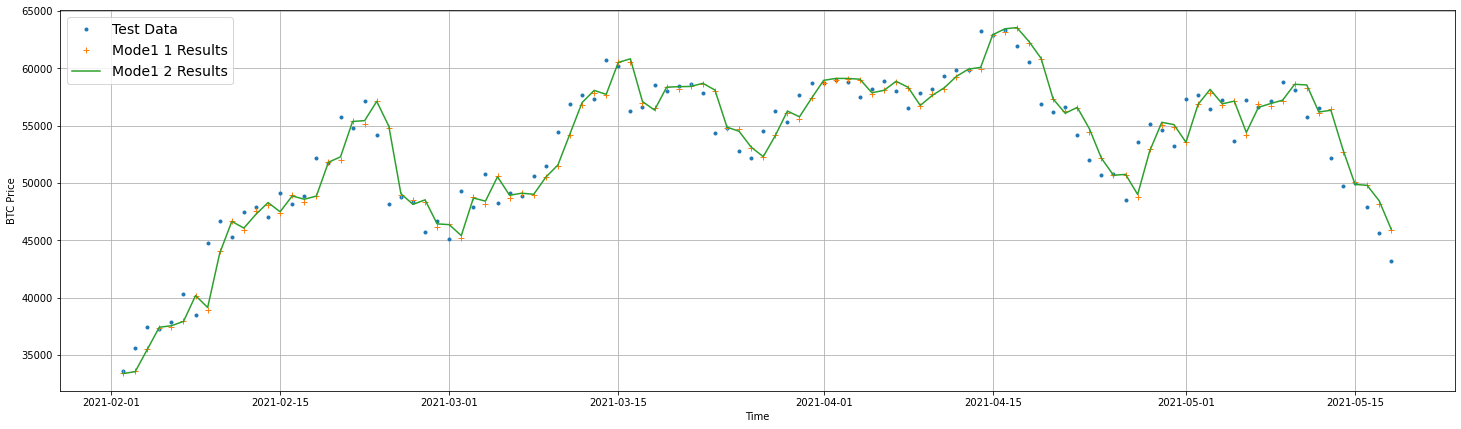

In [51]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "Test Data")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format="+",
                 label = "Mode1 1 Results")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format="-",
                 label = "Mode1 2 Results")


## Model 3: Dense model (window_size = 30, horizon = 8)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30

In [53]:
full_windows, full_labels = make_windows(btc_price, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(2751, 2751)

In [54]:
for i in range(3):
  print(f'Windows: {full_windows[i]} - > Label: {full_labels[i]}')

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] - > Label: [196.02499 198.04883 198.93233 200.543   210.3075  225.02    248.25333]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
 124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
 188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
 197.4     196.02499] - > Label: [198.04883 198.93233 200.543   210.3075  225.02    248.25333 262.32666]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
 125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
 137.92333 142.95166 152.55183 160.33883 164.31499 177.6333

In [55]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [56]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
], name = 'model_3_dense')

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1356.1906 - mae: 1356.1906 - mse: 8699529.0000  

18/18 [==============================] - 2s 38ms/step - loss: 1347.9553 - mae: 1347.9553 - mse: 8618967.0000 - val_loss: 3132.6616 - val_mae: 3132.6614 - val_mse: 26138130.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 510.4971 - mae: 510.4971 - mse: 1052186.2500

18/18 [==============================] - 0s 28ms/step - loss: 558.2452 - mae: 558.2452 - mse: 1410202.7500 - val_loss: 2644.6199 - val_mae: 2644.6199 - val_mse: 20209650.0000
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 454.1896 - mae: 454.1896 - mse: 974813.1875

18/18 [==============================] - 1s 31ms/step - loss: 447.9608 - mae: 447.9608 - mse: 948041.3125 - val_loss: 2311.6069 - val_mae: 2311.6069 - val_mse: 15370413.0000
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 397.3425 - mae: 397.3425 - mse: 758671.1875 

18/18 [==============================] - 1s 29ms/step - loss: 397.3425 - mae: 397.3425 - mse: 758671.1875 - val_loss: 1952.4760 - val_mae: 1952.4760 - val_mse: 11621327.0000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 357.9464 - mae: 357.9464 - mse: 621755.7500 - val_loss: 2005.8099 - val_mae: 2005.8099 - val_mse: 12165679.0000
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 337.5791 - mae: 337.5791 - mse: 549660.5000

18/18 [==============================] - 0s 29ms/step - loss: 334.0911 - mae: 334.0911 - mse: 536546.2500 - val_loss: 1915.0137 - val_mae: 1915.0137 - val_mse: 10472952.0000
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 313.8366 - mae: 313.8366 - mse: 482918.2812

18/18 [==============================] - 1s 31ms/step - loss: 312.1984 - mae: 312.1984 - mse: 480003.2500 - val_loss: 1668.7162 - val_mae: 1668.7162 - val_mse: 8579302.0000
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 296.8784 - mae: 296.8784 - mse: 438124.9375

18/18 [==============================] - 1s 30ms/step - loss: 296.8784 - mae: 296.8784 - mse: 438124.9375 - val_loss: 1565.8303 - val_mae: 1565.8303 - val_mse: 7866548.5000
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 290.7436 - mae: 290.7436 - mse: 422813.5625 - val_loss: 1696.1750 - val_mae: 1696.1750 - val_mse: 8782914.0000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 290.7830 - mae: 290.7830 - mse: 413476.5312

18/18 [==============================] - 1s 30ms/step - loss: 290.7830 - mae: 290.7830 - mse: 413476.5312 - val_loss: 1560.0850 - val_mae: 1560.0850 - val_mse: 7782050.0000
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 278.0369 - mae: 278.0369 - mse: 388063.7812

18/18 [==============================] - 1s 30ms/step - loss: 278.0369 - mae: 278.0369 - mse: 388063.7812 - val_loss: 1500.0103 - val_mae: 1500.0103 - val_mse: 7301007.5000
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 272.0209 - mae: 272.0209 - mse: 380038.9062 - val_loss: 1625.5227 - val_mae: 1625.5227 - val_mse: 8171789.5000
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 275.2997 - mae: 275.2997 - mse: 378865.1562

18/18 [==============================] - 0s 29ms/step - loss: 275.2116 - mae: 275.2116 - mse: 378813.4688 - val_loss: 1450.3741 - val_mae: 1450.3741 - val_mse: 6999737.0000
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 268.8202 - mae: 268.8202 - mse: 368494.8750 - val_loss: 1456.6010 - val_mae: 1456.6010 - val_mse: 6965290.0000
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 271.3068 - mae: 271.3068 - mse: 373157.0000 - val_loss: 1645.6757 - val_mae: 1645.6757 - val_mse: 8200795.0000
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 264.7931 - mae: 264.7931 - mse: 358497.0000 - val_loss: 1498.0576 - val_mae: 1498.0576 - val_mse: 7164399.5000
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 264.8276 - mae: 264.8276 - mse: 359969.0625 - val_loss: 1579.0410 - val_mae: 1579.0410 - val_mse: 7813218.5000
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 260.3793 - ma

18/18 [==============================] - 0s 29ms/step - loss: 274.3466 - mae: 274.3466 - mse: 363888.0938 - val_loss: 1425.2012 - val_mae: 1425.2012 - val_mse: 6725326.5000
Epoch 21/100
18/18 [==============================] - 0s 6ms/step - loss: 253.6287 - mae: 253.6287 - mse: 335937.9062 - val_loss: 1473.4614 - val_mae: 1473.4614 - val_mse: 6889191.5000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 329.1829 - mae: 329.1829 - mse: 450992.0000

18/18 [==============================] - 1s 42ms/step - loss: 257.1046 - mae: 257.1046 - mse: 334904.0625 - val_loss: 1396.3737 - val_mae: 1396.3737 - val_mse: 6426323.0000
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 259.5010 - mae: 259.5010 - mse: 339060.1562 - val_loss: 1430.9535 - val_mae: 1430.9535 - val_mse: 6723059.0000
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 273.8238 - mae: 273.8238 - mse: 357675.1875 - val_loss: 1421.2733 - val_mae: 1421.2733 - val_mse: 6625707.5000
Epoch 25/100
18/18 [==============================] - 0s 8ms/step - loss: 257.6760 - mae: 257.6760 - mse: 332724.5625 - val_loss: 1680.2289 - val_mae: 1680.2289 - val_mse: 7959290.0000
Epoch 26/100
18/18 [==============================] - 0s 8ms/step - loss: 254.5734 - mae: 254.5734 - mse: 326738.6875 - val_loss: 1418.4789 - val_mae: 1418.4789 - val_mse: 6605418.0000
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 247.2897 - ma

18/18 [==============================] - 1s 44ms/step - loss: 248.6595 - mae: 248.6595 - mse: 319103.5625 - val_loss: 1395.1343 - val_mae: 1395.1343 - val_mse: 6342976.0000
Epoch 29/100
15/18 [========================>.....] - ETA: 0s - loss: 240.7790 - mae: 240.7790 - mse: 298384.1562

18/18 [==============================] - 1s 43ms/step - loss: 246.2801 - mae: 246.2801 - mse: 317311.4688 - val_loss: 1391.8085 - val_mae: 1391.8085 - val_mse: 6326177.5000
Epoch 30/100
14/18 [======================>.......] - ETA: 0s - loss: 248.3859 - mae: 248.3859 - mse: 312294.8125

18/18 [==============================] - 1s 36ms/step - loss: 248.2600 - mae: 248.2600 - mse: 319585.3750 - val_loss: 1381.0291 - val_mae: 1381.0291 - val_mse: 6252954.5000
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 207.8336 - mae: 207.8336 - mse: 254967.9062

18/18 [==============================] - 0s 29ms/step - loss: 240.5074 - mae: 240.5074 - mse: 304708.2188 - val_loss: 1332.5359 - val_mae: 1332.5359 - val_mse: 5977661.0000
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 241.2797 - mae: 241.2797 - mse: 306845.3750 - val_loss: 1336.7236 - val_mae: 1336.7236 - val_mse: 6006736.5000
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 229.9254 - mae: 229.9254 - mse: 285887.0312

18/18 [==============================] - 0s 28ms/step - loss: 241.1268 - mae: 241.1268 - mse: 305967.8125 - val_loss: 1329.9056 - val_mae: 1329.9056 - val_mse: 5947709.0000
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 241.2120 - mae: 241.2120 - mse: 305336.6562 - val_loss: 1450.4147 - val_mae: 1450.4147 - val_mse: 6491634.5000
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 253.6631 - mae: 253.6631 - mse: 320331.0625 - val_loss: 1395.5381 - val_mae: 1395.5381 - val_mse: 6263352.0000
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 243.1467 - mae: 243.1467 - mse: 310688.2500 - val_loss: 1422.6692 - val_mae: 1422.6692 - val_mse: 6590384.5000
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 260.1759 - mae: 260.1759 - mse: 331742.6250 - val_loss: 1388.9512 - val_mae: 1388.9512 - val_mse: 6220318.5000
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 239.5374 - ma

18/18 [==============================] - 1s 30ms/step - loss: 245.4053 - mae: 245.4053 - mse: 311132.2188 - val_loss: 1318.7614 - val_mae: 1318.7614 - val_mse: 5834840.5000
Epoch 43/100
18/18 [==============================] - ETA: 0s - loss: 235.9277 - mae: 235.9277 - mse: 292240.2188

18/18 [==============================] - 0s 29ms/step - loss: 235.9277 - mae: 235.9277 - mse: 292240.2188 - val_loss: 1295.2255 - val_mae: 1295.2255 - val_mse: 5784519.5000
Epoch 44/100
18/18 [==============================] - 0s 6ms/step - loss: 241.2146 - mae: 241.2146 - mse: 301801.3125 - val_loss: 1328.6631 - val_mae: 1328.6631 - val_mse: 5817330.0000
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 234.2875 - mae: 234.2875 - mse: 289255.6875 - val_loss: 1431.8892 - val_mae: 1431.8892 - val_mse: 6293785.0000
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 239.9987 - mae: 239.9987 - mse: 297218.2812 - val_loss: 1311.3060 - val_mae: 1311.3060 - val_mse: 5748893.0000
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 239.9172 - mae: 239.9172 - mse: 300817.6875 - val_loss: 1327.5021 - val_mae: 1327.5021 - val_mse: 5821781.5000
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 232.3142 - ma

18/18 [==============================] - 0s 29ms/step - loss: 234.6383 - mae: 234.6383 - mse: 286473.9062 - val_loss: 1284.9669 - val_mae: 1284.9669 - val_mse: 5581880.5000
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 236.5603 - mae: 236.5603 - mse: 291689.6250 - val_loss: 1292.1696 - val_mae: 1292.1696 - val_mse: 5669089.0000
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 236.1045 - mae: 236.1045 - mse: 290718.5312 - val_loss: 1315.4712 - val_mae: 1315.4712 - val_mse: 5727310.0000
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 231.4742 - mae: 231.4742 - mse: 282291.5938 - val_loss: 1336.1600 - val_mae: 1336.1600 - val_mse: 5791193.0000
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 234.5814 - mae: 234.5814 - mse: 286569.9375 - val_loss: 1381.5276 - val_mae: 1381.5276 - val_mse: 5996745.5000
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 240.2197 - ma

18/18 [==============================] - 1s 31ms/step - loss: 232.4002 - mae: 232.4002 - mse: 285086.6562 - val_loss: 1277.9431 - val_mae: 1277.9431 - val_mse: 5603805.5000
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 233.6470 - mae: 233.6470 - mse: 285549.6875 - val_loss: 1292.9231 - val_mae: 1292.9231 - val_mse: 5586521.5000
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 228.8017 - mae: 228.8017 - mse: 280165.3125 - val_loss: 1370.9279 - val_mae: 1370.9279 - val_mse: 5962469.0000
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 232.5282 - mae: 232.5282 - mse: 283945.5938 - val_loss: 1322.4888 - val_mae: 1322.4888 - val_mse: 5966114.0000
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 236.0768 - mae: 236.0768 - mse: 287481.4688 - val_loss: 1389.9056 - val_mae: 1389.9056 - val_mse: 6168255.5000
Epoch 64/100
18/18 [==============================] - ETA: 0s - loss: 230.0093 - mae: 2

18/18 [==============================] - 1s 30ms/step - loss: 230.0093 - mae: 230.0093 - mse: 280738.7500 - val_loss: 1259.8029 - val_mae: 1259.8029 - val_mse: 5408730.0000
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 234.6073 - mae: 234.6073 - mse: 286991.2812 - val_loss: 1368.5399 - val_mae: 1368.5399 - val_mse: 5868201.0000
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 228.9123 - mae: 228.9123 - mse: 276525.6875 - val_loss: 1454.0624 - val_mae: 1454.0624 - val_mse: 6496310.0000
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 240.1113 - mae: 240.1113 - mse: 292595.8438 - val_loss: 1274.3383 - val_mae: 1274.3383 - val_mse: 5458670.0000
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 231.1616 - mae: 231.1616 - mse: 280027.5938 - val_loss: 1286.2400 - val_mae: 1286.2400 - val_mse: 5510250.0000
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 228.6967 - ma

18/18 [==============================] - 0s 28ms/step - loss: 229.7812 - mae: 229.7812 - mse: 278464.0625 - val_loss: 1238.6508 - val_mae: 1238.6508 - val_mse: 5334828.0000
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 223.9769 - mae: 223.9769 - mse: 271387.2188 - val_loss: 1247.0397 - val_mae: 1247.0397 - val_mse: 5346207.5000
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 228.7041 - mae: 228.7041 - mse: 278365.7500 - val_loss: 1319.4495 - val_mae: 1319.4495 - val_mse: 5642726.5000
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 225.2793 - mae: 225.2793 - mse: 270439.7188 - val_loss: 1467.4567 - val_mae: 1467.4567 - val_mse: 6582892.0000
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 229.0920 - mae: 229.0920 - mse: 276431.5312 - val_loss: 1312.9672 - val_mae: 1312.9672 - val_mse: 5680362.0000
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 226.2273 - mae: 2

18/18 [==============================] - 1s 30ms/step - loss: 226.2900 - mae: 226.2900 - mse: 273254.6250 - val_loss: 1233.1237 - val_mae: 1233.1237 - val_mse: 5261620.5000
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 225.6592 - mae: 225.6592 - mse: 267550.2188 - val_loss: 1264.0913 - val_mae: 1264.0913 - val_mse: 5395393.5000
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 227.4898 - mae: 227.4898 - mse: 269848.5312 - val_loss: 1309.1740 - val_mae: 1309.1740 - val_mse: 5609667.5000
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 230.1991 - mae: 230.1991 - mse: 272889.3438 - val_loss: 1309.8613 - val_mae: 1309.8613 - val_mse: 5655729.0000
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 224.7278 - mae: 224.7278 - mse: 273305.1875 - val_loss: 1234.9496 - val_mae: 1234.9496 - val_mse: 5296893.0000
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 223.6681 - ma

In [57]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1284.5764 - mae: 1284.5764 - mse: 5487002.0000


[1284.576416015625, 1284.576416015625, 5487002.0]

In [58]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')

In [59]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1233.1237 - mae: 1233.1237 - mse: 5261621.0000


[1233.1236572265625, 1233.1236572265625, 5261621.0]

In [60]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)

model_3_preds[:1]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[9319.325, 9305.622, 9497.502, 9342.991, 9507.319, 9536.175,
        9473.981]], dtype=float32)>

In [61]:
def evaluate_preds(y_true, y_pred):

  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
     

In [62]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1233.1237,
 'mse': 5261620.5,
 'rmse': 1417.061,
 'mape': 5.575555,
 'mase': 2.1942747}

In [63]:
naive_results, model_1_results, model_2_results, model_3_results

({'mae': 567.9802,
  'mse': 1147547.0,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.99957},
 {'mae': 563.17535,
  'mse': 1155277.0,
  'rmse': 1074.8381,
  'mape': 2.5082808,
  'mase': 0.9893431},
 {'mae': 565.72156,
  'mse': 1163889.8,
  'rmse': 1078.8372,
  'mape': 2.5275133,
  'mase': 0.9938161},
 {'mae': 1233.1237,
  'mse': 5261620.5,
  'rmse': 1417.061,
  'mape': 5.575555,
  'mase': 2.1942747})

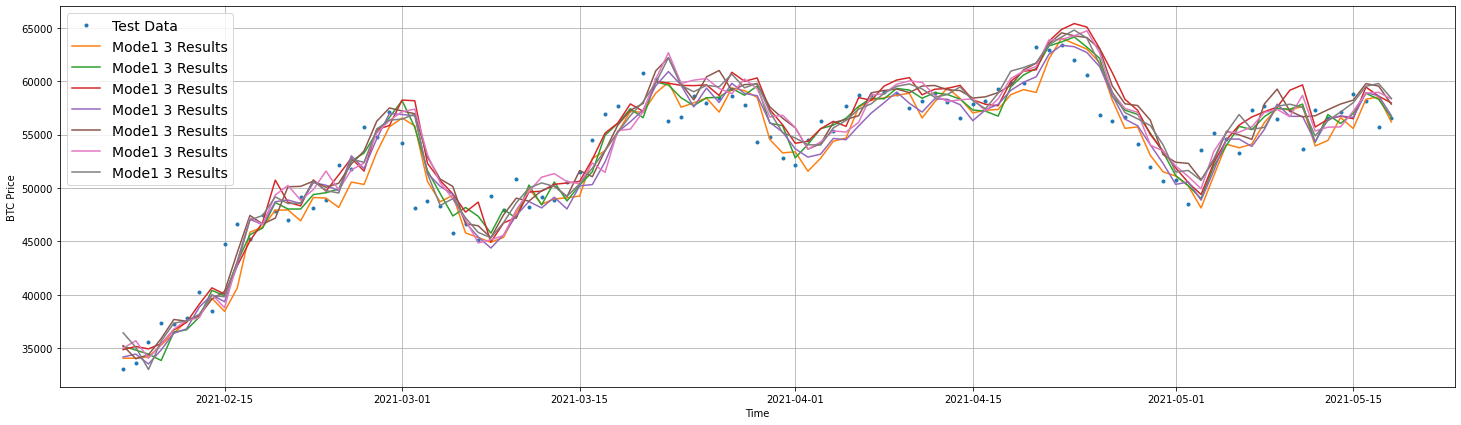

In [64]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "Test Data")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_3_preds,
                 start = offset,
                 format="-",
                 label = "Mode1 3 Results")

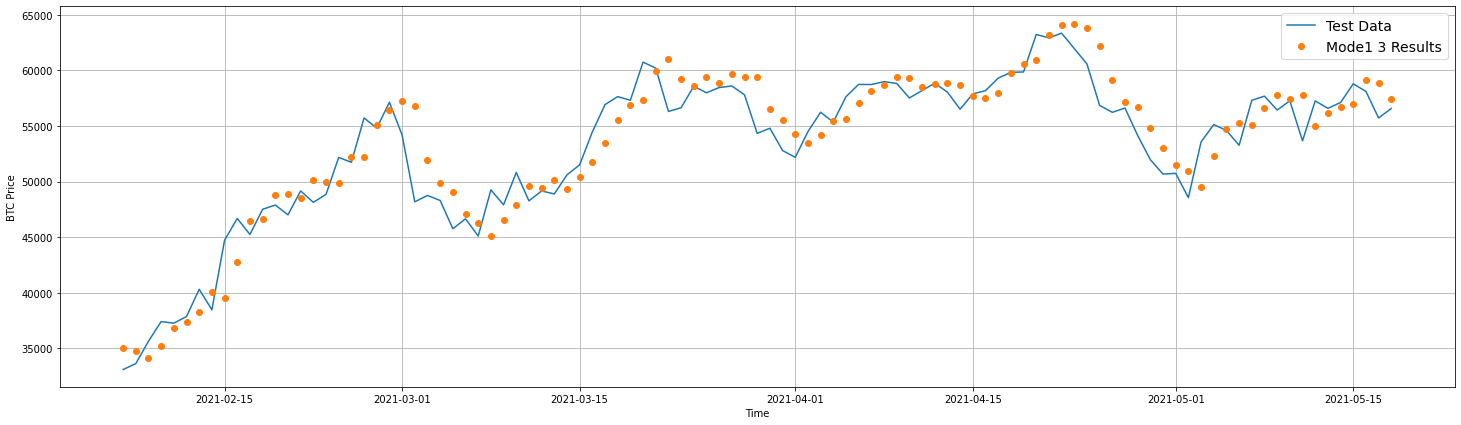

In [65]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 format = '-',
                 label = "Test Data")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = tf.reduce_mean(model_3_preds, axis = 1),
                 start = offset,
                 format="o",
                 label = "Mode1 3 Results")

In [66]:
results = pd.DataFrame([naive_results,
                        model_1_results,
                        model_2_results,
                        model_3_results], index = ['model_0',
                                                   'mode_1',
                                                   'model_2',
                                                   'model_3'])

results

,mae,mse,rmse,mape,mase
model_0,567.980225,1147547.00,1071.236206,2.516525,0.999570
mode_1,563.175354,1155277.00,1074.838135,2.508281,0.989343
model_2,565.721558,1163889.75,1078.837158,2.527513,0.993816
model_3,1233.123657,5261620.50,1417.061035,5.575555,2.194275


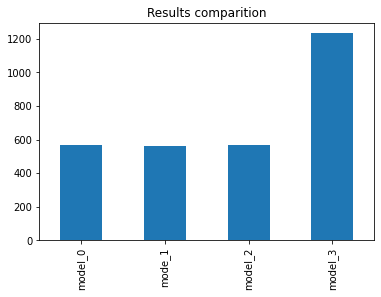

In [67]:
results['mae'].plot(kind = 'bar', title = 'Results comparition');

In [68]:
## Model 4: Conv1D

In [69]:
HORIZON = 1
WINDOW_SIZE = 7

In [70]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

len(full_windows), len(full_labels)

(2780, 2780)

In [71]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows),len(train_labels)

(2224, 2224)

In [72]:
train_windows[0].shape

(7,)

In [73]:
x = tf.constant(train_windows[0])

x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [74]:
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))

In [75]:
print(f'Original shape: {x.shape}')
print(f'Expanded shape: {expand_dim_layer(x).shape}')
print(f'Origianl values with expanded shape: \n {expand_dim_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Origianl values with expanded shape: 
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [76]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [77]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [78]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 625.3212 - mae: 625.3212 - mse: 1293390.3750


[625.3211669921875, 625.3211669921875, 1293390.375]

In [79]:
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D/')

In [80]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 577.3640 - mae: 577.3640 - mse: 1208995.6250


[577.364013671875, 577.364013671875, 1208995.625]

In [81]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8925.179, 8796.018, 8988.382, 8807.997, 8747.957, 8745.511,
       8697.406, 8541.492, 8476.074, 8518.515], dtype=float32)>

In [82]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)

model_4_results

{'mae': 577.364,
 'mse': 1208995.6,
 'rmse': 1099.5433,
 'mape': 2.5882654,
 'mase': 1.0142686}

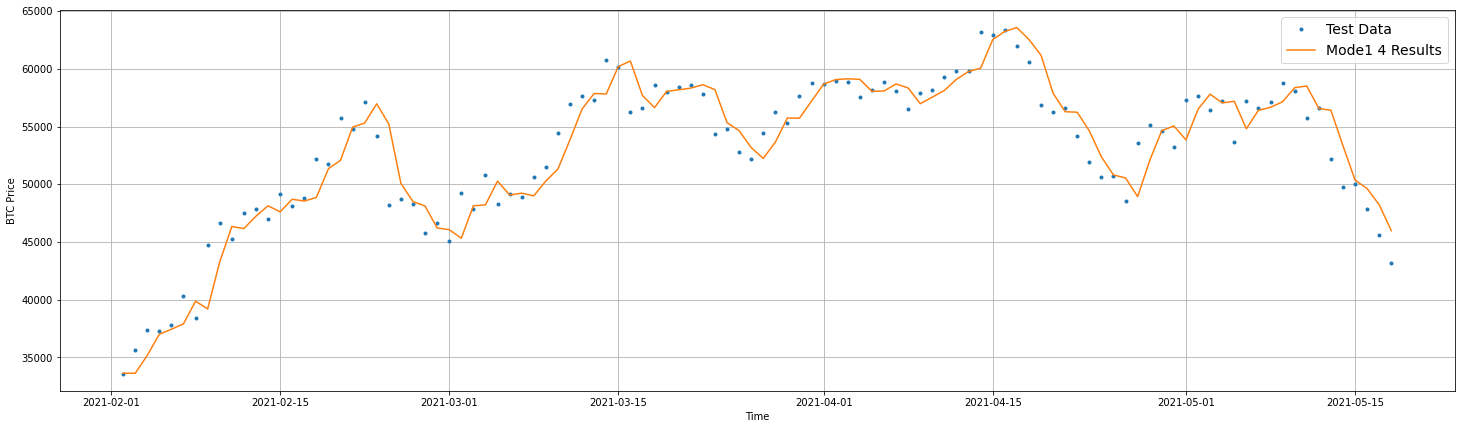

In [83]:
offset = 450
plt.figure(figsize=(25,7))

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "Test Data")


plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_4_preds,
                 start = offset,
                 format="-",
                 label = "Mode1 4 Results")

## Model 5: RNN (LSTM)

In [84]:
tf.random.set_seed(42)


inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation = 'relu')(x)
#x = layers.Dense(32, activation = 'relu')(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs = output, name = 'model_5_lstm')

model_5.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae','mse']
)

model_5.fit(
    train_windows,
    train_labels,
    epochs = 100,
    verbose = 1,
    batch_size = 128,
    validation_data = (test_windows,test_labels),
    callbacks = [create_model_checkpoint(model_name = model_5.name)]
)

Epoch 1/100
18/18 [==============================] - 4s 119ms/step - loss: 1880.9501 - mae: 1880.9501 - mse: 9240617.0000 - val_loss: 4508.4165 - val_mae: 4508.4165 - val_mse: 37822300.0000
Epoch 2/100
18/18 [==============================] - 2s 121ms/step - loss: 291.1889 - mae: 291.1889 - mse: 336547.2812 - val_loss: 971.4481 - val_mae: 971.4481 - val_mse: 3058135.0000
Epoch 3/100
18/18 [==============================] - 2s 143ms/step - loss: 165.9047 - mae: 165.9047 - mse: 134620.3906 - val_loss: 939.7781 - val_mae: 939.7781 - val_mse: 2692277.0000
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 167.9086 - mae: 167.9086 - mse: 147073.0938 - val_loss: 969.8898 - val_mae: 969.8898 - val_mse: 3122434.0000
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 169.5881 - mae: 169.5881 - mse: 150712.1875 - val_loss: 950.6883 - val_mae: 950.6883 - val_mse: 2993882.2500
Epoch 6/100
18/18 [==============================] - 2s 105ms/step - loss: 160

In [85]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 618.7177 - mae: 618.7177 - mse: 1311485.2500


[618.7176513671875, 618.7176513671875, 1311485.25]

In [86]:
model_5 = tf.keras.models.load_model('model_experiments/model_5_lstm')

In [87]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 585.7709 - mae: 585.7709 - mse: 1237530.2500


[585.7708740234375, 585.7708740234375, 1237530.25]

In [88]:
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 2ms/step


In [89]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)

model_5_results

{'mae': 585.7708,
 'mse': 1237530.2,
 'rmse': 1112.4434,
 'mape': 2.645655,
 'mase': 1.0290371}

In [90]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [91]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

In [92]:

block_reward_2_date = np.datetime64('2012-11-28')
block_reward_3_date = np.datetime64('2016-07-09')
block_reward_4_date = np.datetime64('2020-05-18')


In [93]:
block_reward_2_date 

numpy.datetime64('2012-11-28')

In [94]:
bitcoin_prices_block_reward = bitcoin_prices.copy()

In [95]:
bitcoin_prices_block_reward['block_reward'] = None

In [96]:
bitcoin_prices_block_reward.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [97]:
bitcoin_prices_block_reward.loc[:block_reward_3_date,['block_reward']] = block_reward_2
bitcoin_prices_block_reward.loc[block_reward_3_date:block_reward_4_date,['block_reward']] = block_reward_3
bitcoin_prices_block_reward.loc[block_reward_4_date:,['block_reward']] = block_reward_4


In [98]:
bitcoin_prices_block_reward.isna().sum()

Price           0
block_reward    0
dtype: int64

In [99]:
bitcoin_prices_block_reward['block_reward'] = bitcoin_prices_block_reward['block_reward'].astype(np.int64)

In [100]:
bitcoin_prices_block_reward.describe()

,Price,block_reward
count,2787.000000,2787.000000
mean,6529.845141,15.932544
std,10887.847444,7.116690
min,108.584830,6.000000
25%,460.087500,12.000000
50%,2780.182500,12.000000
75%,8506.923720,25.000000
max,63346.789035,25.000000


In [101]:
from sklearn.preprocessing import minmax_scale

scaled_btc_prices = pd.DataFrame(minmax_scale(bitcoin_prices_block_reward),
                                 columns = bitcoin_prices_block_reward.columns,
                                 index = bitcoin_prices_block_reward.index)

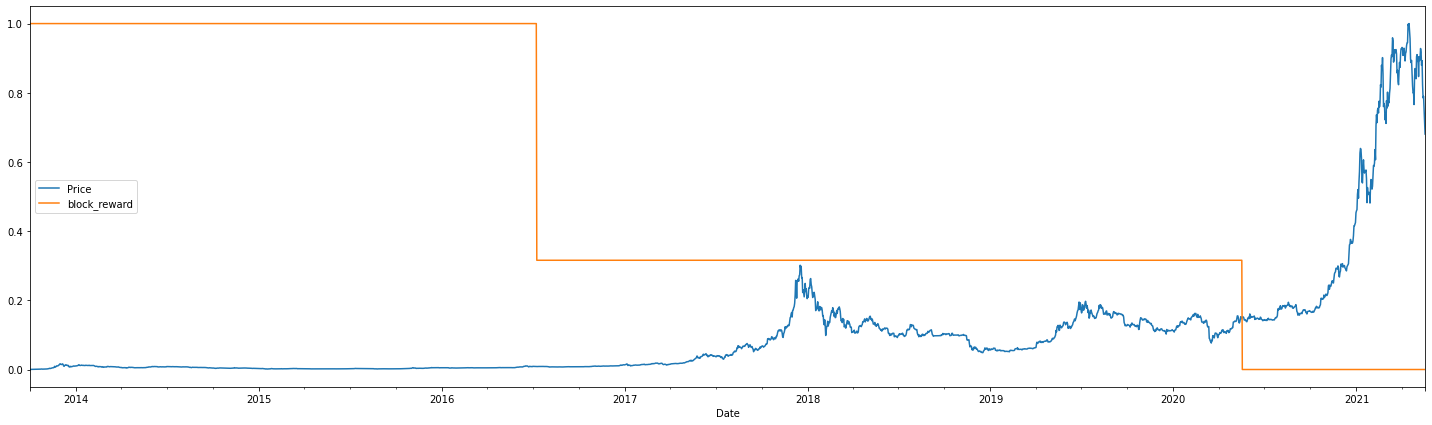

In [102]:

scaled_btc_prices.plot(figsize = (25,7));

## Model 6: Dense (multivariate timer series)

In [103]:


# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7
     


In [104]:


# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block_reward.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)
     


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [105]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [106]:


# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)
     


(2224, 2224, 556, 556)

In [107]:


tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])
     


In [108]:


# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)
     


18/18 [==============================] - 0s 2ms/step - loss: 569.2336


569.2335815429688

In [109]:

# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8833.84 , 8761.559, 9031.124, 8735.784, 8704.117, 8741.478,
       8670.559, 8490.62 , 8448.065, 8518.922], dtype=float32)>

In [110]:


# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results
     


{'mae': 569.2336,
 'mse': 1165402.0,
 'rmse': 1079.5378,
 'mape': 2.5549982,
 'mase': 0.99998575}

## Model 7: N_BEATS

In [111]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation = 'relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation = 'linear', name = 'theta')

  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    
    theta = self.theta_layer(x)
    backcast,forecast = theta[:,:self.input_size], theta[:, -self.horizon]

    return backcast, forecast


In [112]:
dummy_nbeats_block_layer = NBeatsBlock(
    input_size = WINDOW_SIZE,
    theta_size = WINDOW_SIZE + HORIZON,
    horizon = HORIZON,
    n_neurons = 128,
    n_layers =4    
)

In [113]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [114]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

In [115]:
print(f'Backcast: {tf.squeeze(backcast.numpy())}')
print(f'Forecast: {tf.squeeze(forecast.numpy())}')

Backcast: [ 0.34473252  0.557809   -0.08269614  0.49428666  0.09866294 -0.5486617
  0.35898829]
Forecast: -0.1910477578639984


In [116]:
HORIZON = 1
WINDOWS_SIZE = 7

In [117]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [118]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

In [119]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [120]:
X = bitcoin_prices_nbeats.dropna().drop('Price', axis = 1)
y = bitcoin_prices_nbeats.dropna()['Price']

split_size = int(len(X)*0.8)

X_train,X_test,y_train,y_test = X[:split_size],X[split_size:],y[:split_size],y[split_size:]

In [121]:
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [122]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [138]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON

THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [124]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracked = layers.subtract([tensor_1,tensor_2])
added = layers.add([tensor_1, tensor_2])

In [125]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [126]:
subtracked

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>

In [127]:
added

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>

In [147]:
%%time

tf.random.set_seed(42)

# Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)

nbeats_block_layer = NBeatsBlock(
    input_size = INPUT_SIZE,
    theta_size = THETA_SIZE,
    horizon = HORIZON,
    n_neurons = N_NEURONS,
    n_layers = N_LAYERS  ,
    name = 'Initial_Block'  
)

# Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)

stack_input = layers.Input(shape = (INPUT_SIZE), name = 'stackinput')

# Make the initial backcast and forecasts for the model with the layer created in (1)

backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name = f'Subtract_00')

# Use a for loop to create stacks of block layers

for i,_ in enumerate(range(N_STACKS-1)):

# Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts

  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE, 
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f'NBeatsBlock_{i}'
  )(residuals)

# Create the double residual stacking using subtract and add layers

  residuals = layers.subtract([residuals,backcast], name = f'Subtract_{i}')
  forecast = layers.add([forecast,block_forecast], name = f'Add_{i}')

# Put the model inputs and outputs together using tf.keras.Model()

model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = "model_7_nbeats")

# Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)

model_7.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae','mse']
)

# Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:

model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            verbose = 0,
            validation_data = test_dataset,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                              factor = 0.2,
                                                              patience = 5,
                                                              min_lr = 0.001,
                                                              verbose = 1)])



CPU times: user 2min 22s, sys: 3.05 s, total: 2min 25s
Wall time: 2min 49s


In [148]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 581.3569 - mae: 581.3569 - mse: 1152477.8750


[581.35693359375, 581.35693359375, 1152477.875]

In [149]:
model_7_preds = make_preds(model_7,test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8883.737, 8824.105, 9009.079, 8809.743, 8750.95 , 8750.568,
       8644.227, 8501.5  , 8479.157, 8494.864], dtype=float32)>

In [150]:
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)

model_7_results

{'mae': 581.35693,
 'mse': 1152477.9,
 'rmse': 1073.5352,
 'mape': 2.7143037,
 'mase': 1.0212831}

In [151]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [153]:
from tensorflow.keras.utils import plot_model

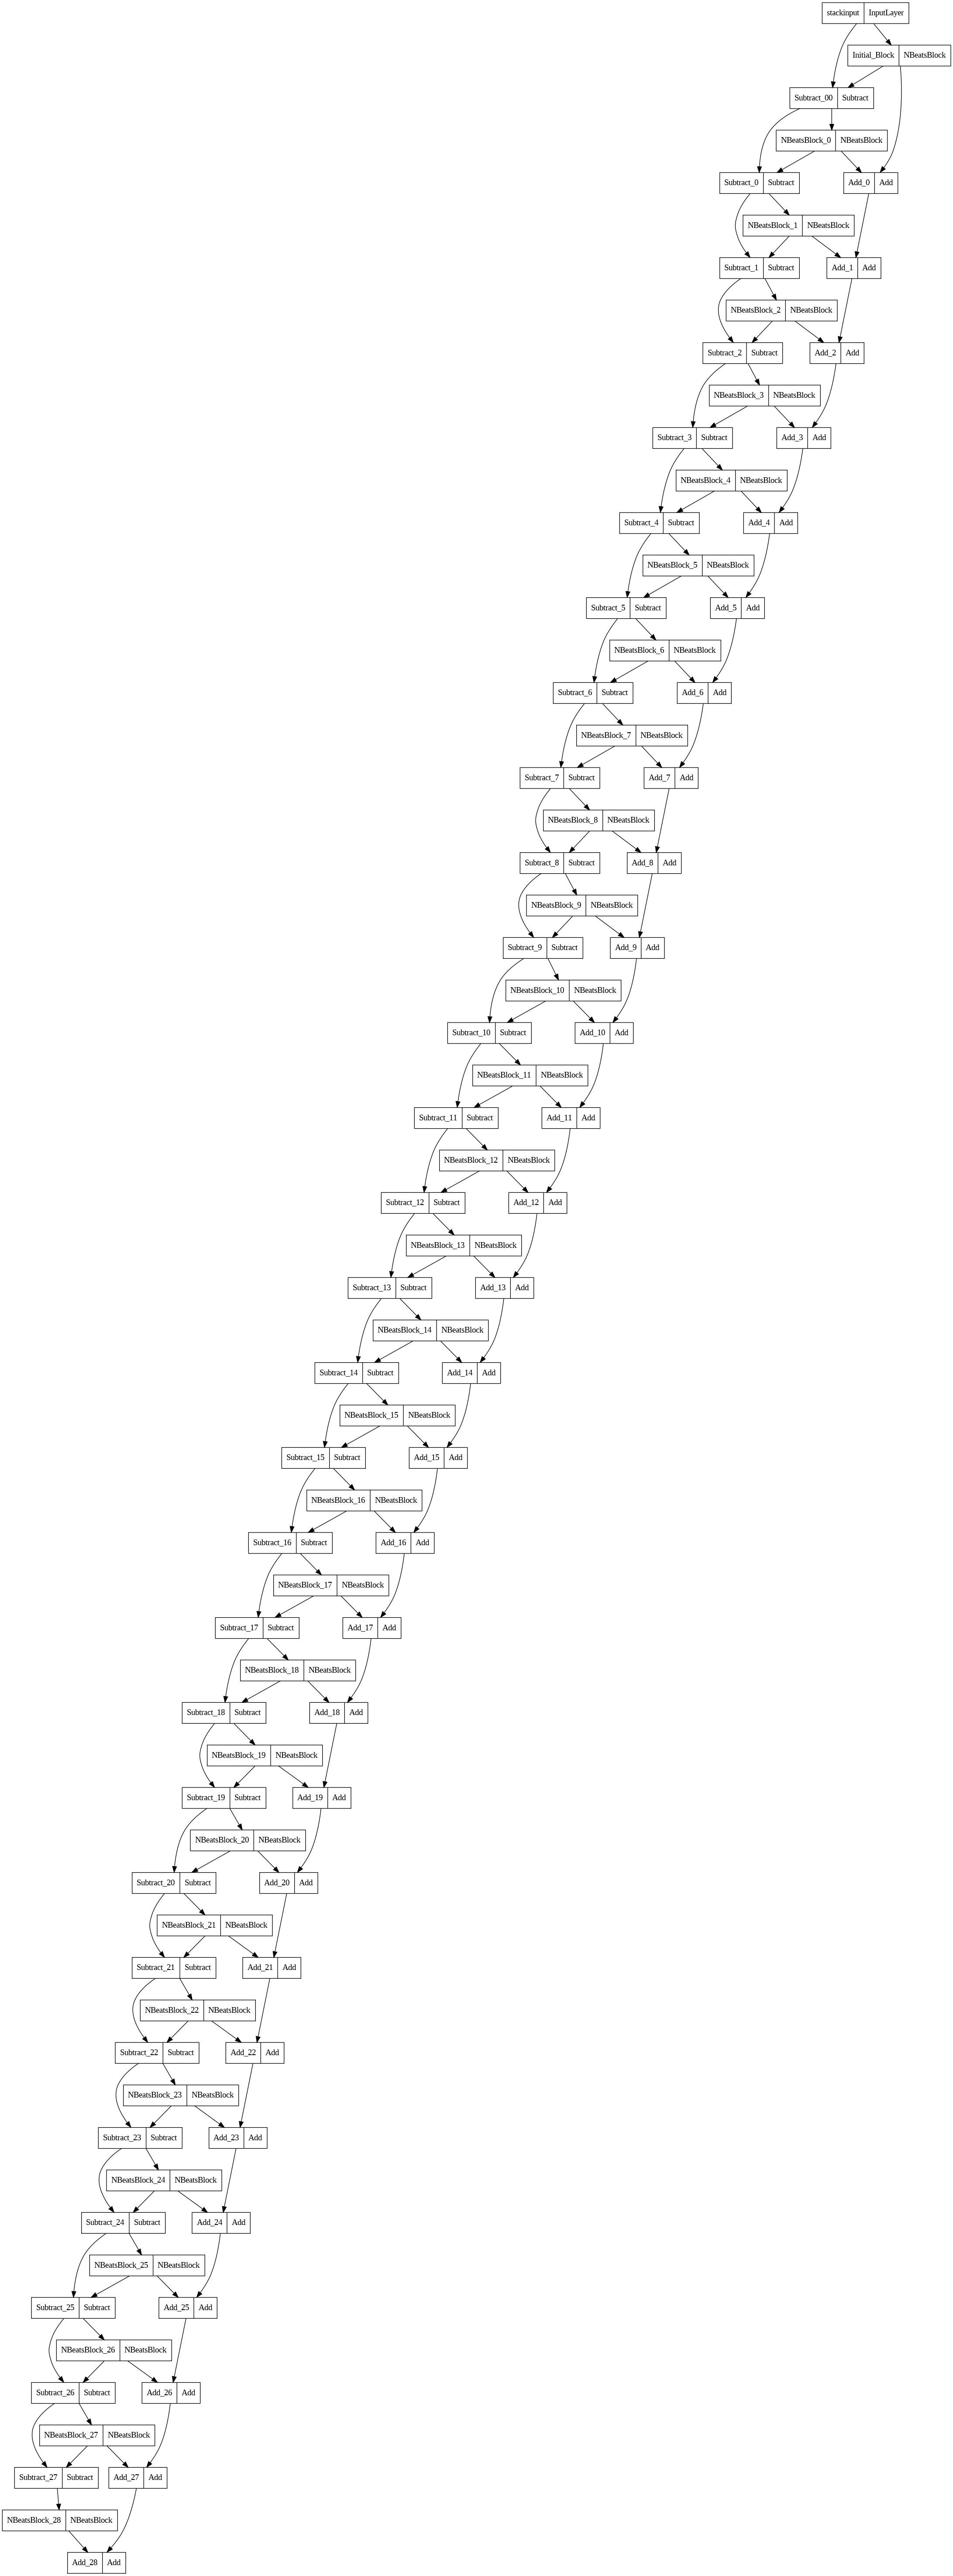

In [154]:
plot_model(model_7)

## Model 8: Ensamble model

In [155]:
HORIZON = 1
WINDOW_SIZE =7

In [159]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fns = ['mae','mse','mape']):
  
  """
  Returns a listo of num_iter models each trained on MAE, MSE, MAPE loss.
  """

  ensemble_models = []

  for i in range(num_iter):
    for loss_fn in loss_fns:
      print(f'Otimizing model by reducing: {loss_fn} for {num_epochs} epochs, model number: {i}')

      model = tf.keras.Sequential([
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          layers.Dense(HORIZON)
      ])

      model.compile(
          loss = loss_fn,
          optimizer = tf.keras.optimizers.Adam(),
          metrics = ['mae','mse']
      )

      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                  patience = 100,
                                                                  verbose = 1)])


      ensemble_models.append(model)

  return ensemble_models


In [160]:
%%time

model_8 = get_ensemble_models(num_iter = 5,
                              num_epochs = 100)

Otimizing model by reducing: mae for 100 epochs, model number: 0
Otimizing model by reducing: mse for 100 epochs, model number: 0
Otimizing model by reducing: mape for 100 epochs, model number: 0
Otimizing model by reducing: mae for 100 epochs, model number: 1
Otimizing model by reducing: mse for 100 epochs, model number: 1
Otimizing model by reducing: mape for 100 epochs, model number: 1
Otimizing model by reducing: mae for 100 epochs, model number: 2
Otimizing model by reducing: mse for 100 epochs, model number: 2
Otimizing model by reducing: mape for 100 epochs, model number: 2
Otimizing model by reducing: mae for 100 epochs, model number: 3
Otimizing model by reducing: mse for 100 epochs, model number: 3
Otimizing model by reducing: mape for 100 epochs, model number: 3
Otimizing model by reducing: mae for 100 epochs, model number: 4
Otimizing model by reducing: mse for 100 epochs, model number: 4
Otimizing model by reducing: mape for 100 epochs, model number: 4
CPU times: user 1min

In [164]:
def make_ensemble_preds(ensemble_models, data):
  
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)

  return tf.constant(tf.squeeze(ensemble_preds))



In [165]:
%%time

ensemble_preds = make_ensemble_preds(ensemble_models = model_8,
                                     data = test_dataset)

1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 38ms/step
CPU times: user 1.03 s, sys: 33.3 ms, total: 1.06 s
Wall time: 1.3 s


In [166]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 7470.972 ,  7416.9736,  7353.846 , ..., 40705.08  , 38548.746 ,
        37259.332 ],
       [ 8807.805 ,  8733.032 ,  8976.571 , ..., 48948.008 , 49753.53  ,
        45791.816 ],
       [ 8541.45  ,  8523.288 ,  8890.104 , ..., 48588.773 , 47328.875 ,
        44554.36  ],
       ...,
       [ 8890.206 ,  8869.235 ,  8971.01  , ..., 50473.4   , 47794.992 ,
        47443.81  ],
       [ 8736.14  ,  8727.308 ,  9082.681 , ..., 51016.56  , 48535.75  ,
        45882.695 ],
       [ 8507.453 ,  8473.168 ,  8798.168 , ..., 48144.45  , 46051.34  ,
        44474.723 ]], dtype=float32)>

In [167]:
ensemble_mean_preds = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean_preds

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8554.622 ,  8512.784 ,  8742.9375,  8476.564 ,  8482.701 ,
        8441.301 ,  8385.958 ,  8260.108 ,  8178.7715,  8252.783 ,
        7980.0625,  7865.38  ,  7801.663 ,  7423.7524,  7112.747 ,
        7065.1924,  6864.612 ,  6976.8296,  6893.26  ,  7224.721 ,
        7184.345 ,  7457.8022,  7365.388 ,  7176.7065,  7117.094 ,
        7067.888 ,  7008.1196,  7133.4536,  7257.528 ,  7303.811 ,
        7326.8755,  7134.223 ,  7023.4175,  6965.012 ,  6956.5854,
        7003.6636,  6866.546 ,  6878.6   ,  6681.6855,  6403.4604,
        7080.823 ,  6948.952 ,  6945.875 ,  7049.5835,  7023.047 ,
        6987.903 ,  6986.488 ,  6990.2393,  6967.9985,  6991.8965,
        7074.2085,  7159.083 ,  7044.8735,  6963.604 ,  6943.882 ,
        6756.2847,  7022.409 ,  7094.6987,  7122.4634,  7456.588 ,
        7782.7188,  7876.2783,  7644.0596,  7825.9424,  7845.5996,
        7911.637 ,  7876.201 ,  8406.311 ,  8608.74  ,  8493.394 ,
        8673.9

In [168]:
ensemble_median_preds = np.median(ensemble_preds, axis = 0)
ensemble_median_preds

array([ 8736.14  ,  8630.661 ,  8925.905 ,  8655.091 ,  8546.946 ,
        8586.681 ,  8553.47  ,  8348.323 ,  8341.881 ,  8398.268 ,
        8166.991 ,  7989.4033,  7982.5366,  7588.78  ,  7263.4287,
        7249.972 ,  7039.1846,  7047.0215,  7037.7285,  7343.1226,
        7267.226 ,  7586.1543,  7407.6245,  7250.0312,  7185.627 ,
        7211.721 ,  7116.0586,  7233.2515,  7384.0483,  7378.133 ,
        7403.403 ,  7225.499 ,  7102.2793,  7096.2153,  7115.799 ,
        7120.6387,  7021.4707,  6967.3794,  6808.0537,  6533.997 ,
        7228.765 ,  7085.3354,  6980.534 ,  7104.7925,  7128.8135,
        7023.5933,  7069.277 ,  7100.0596,  7051.215 ,  7070.047 ,
        7159.6387,  7236.3765,  7130.113 ,  7029.8794,  7038.678 ,
        6911.368 ,  7105.189 ,  7237.166 ,  7200.201 ,  7575.2236,
        7914.446 ,  7952.8994,  7641.8413,  7885.2944,  7997.1523,
        7978.7593,  7954.3423,  8540.757 ,  8751.618 ,  8531.492 ,
        8748.912 ,  8822.615 ,  8544.521 ,  8427.832 ,  8573.8

In [171]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = ensemble_median_preds)

ensemble_results

{'mae': 678.54663,
 'mse': 1413739.6,
 'rmse': 1189.0078,
 'mape': 3.1605396,
 'mase': 1.1920185}

In [173]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}